<a href="https://colab.research.google.com/github/Uemerson/experiments-tensorflow/blob/main/applying_pca_and_reverting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying PCA and reverting

# Setup

In [1]:
import numpy as np
np.set_printoptions(suppress=True)

## Load dataset

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to have a single channel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Train the model on first 50% of the training set
x_train = x_train[:int(0.5 * len(x_train))]
y_train = y_train[:int(0.5 * len(y_train))]

In [3]:
x_train[0].shape

(28, 28, 1)

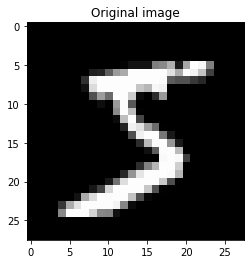

In [4]:
import numpy as np
import matplotlib.pyplot as plt

img = x_train[0]
img = np.expand_dims(img, axis=0)

# Plot the image and the prediction
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title('Original image')
plt.show()

# Max pooling

## Max pooling with np.amax (MNIST)

In [5]:
import numpy as np
import datetime

def max_pooling_np(input_matrix, pool_size=2, stride=2):
    n = input_matrix.shape[0]
    m = input_matrix.shape[1]
    output_matrix = np.zeros((m // pool_size, n // pool_size))
    for i in range(0, m, stride):
        for j in range(0, n, stride):
            # fix out of bounds
            if i + pool_size > n or j + pool_size > m:
                continue
            pool = input_matrix[i:i + pool_size, j:j + pool_size]
            output_matrix[i // pool_size, j // pool_size] = np.amax(pool)
    return output_matrix

def unpooling_np(input_matrix, pool_size=2, stride=2, original_shape=None):
    m, n = input_matrix.shape
    if original_shape:
        m_original = original_shape[0]
        n_original = original_shape[1]
    else:
        m_original = m * pool_size
        n_original = n * pool_size
    output_matrix = np.zeros((m_original, n_original))
    for i in range(m):
        for j in range(n):
            # fix out of bounds
            if i + pool_size > n or j + pool_size > m:
                continue
            pool_value = input_matrix[i, j]
            pool_i = i * pool_size
            pool_j = j * pool_size
            output_matrix[pool_i:pool_i + pool_size, pool_j:pool_j + pool_size] = np.full((pool_size, pool_size), pool_value)
    return output_matrix

# Sample input image with shape (28, 28, 1)
input_numpy_mnist = x_train[0]/255

start = datetime.datetime.now()

# Apply max pooling with kernel size 2 and stride 2
output_numpy_mnist_step_1 = max_pooling_np(input_numpy_mnist, pool_size=2, stride=2)

# Apply max pooling with kernel size 2 and stride 2
output_numpy_mnist_step_2 = max_pooling_np(output_numpy_mnist_step_1, pool_size=2, stride=2)

# Apply max pooling with kernel size 2 and stride 2
output_numpy_mnist_step_3 = max_pooling_np(output_numpy_mnist_step_2, pool_size=2, stride=2)

# Apply unpooling
reconstructed_numpy_mnist_step_3 = unpooling_np(output_numpy_mnist_step_3, pool_size=2, stride=2, original_shape=output_numpy_mnist_step_2.shape)

# Apply unpooling
reconstructed_numpy_mnist_step_2 = unpooling_np(output_numpy_mnist_step_2, pool_size=2, stride=2, original_shape=output_numpy_mnist_step_1.shape)

# Apply unpooling
reconstructed_numpy_mnist_step_1 = unpooling_np(output_numpy_mnist_step_1, pool_size=2, stride=2, original_shape=input_numpy_mnist.shape)

end = datetime.datetime.now()

print(f"Time execution (seconds): {(end - start).seconds}")
print(f"Time execution (microseconds): {(end - start).microseconds}")
print("Input image shape:", input_numpy_mnist.shape)
print("Output step 1 shape:", output_numpy_mnist_step_1.shape)
print("Output step 2 shape:", output_numpy_mnist_step_2.shape)
print("Output step 3 shape:", output_numpy_mnist_step_3.shape)
print("Reconstructed step 3 shape:", reconstructed_numpy_mnist_step_3.shape)
print("Reconstructed step 2 shape:", reconstructed_numpy_mnist_step_2.shape)
print("Reconstructed step 1 shape:", reconstructed_numpy_mnist_step_1.shape)

Time execution (seconds): 0
Time execution (microseconds): 3423
Input image shape: (28, 28, 1)
Output step 1 shape: (14, 14)
Output step 2 shape: (7, 7)
Output step 3 shape: (3, 3)
Reconstructed step 3 shape: (7, 7)
Reconstructed step 2 shape: (14, 14)
Reconstructed step 1 shape: (28, 28)


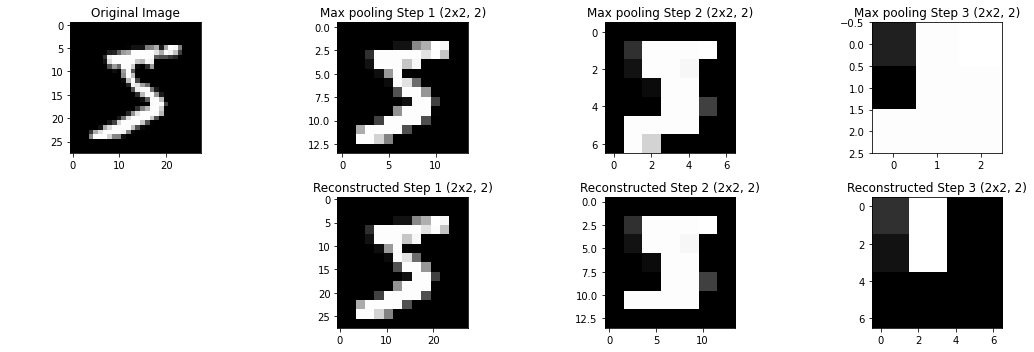

In [6]:
# Plot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 5))

axes[0, 0].imshow(input_numpy_mnist.reshape(28, 28), cmap='gray')
axes[0, 0].set_title('Original Image')

axes[0, 1].imshow(output_numpy_mnist_step_1, cmap='gray')
axes[0, 1].set_title('Max pooling Step 1 (2x2, 2)')

axes[0, 2].imshow(output_numpy_mnist_step_2, cmap='gray')
axes[0, 2].set_title('Max pooling Step 2 (2x2, 2)')

axes[0, 3].imshow(output_numpy_mnist_step_3, cmap='gray')
axes[0, 3].set_title('Max pooling Step 3 (2x2, 2)')

axes[1, 0].axis('off')

axes[1, 3].imshow(reconstructed_numpy_mnist_step_3, cmap='gray')
axes[1, 3].set_title('Reconstructed Step 3 (2x2, 2)')

axes[1, 2].imshow(reconstructed_numpy_mnist_step_2, cmap='gray')
axes[1, 2].set_title('Reconstructed Step 2 (2x2, 2)')

axes[1, 1].imshow(reconstructed_numpy_mnist_step_1, cmap='gray')
axes[1, 1].set_title('Reconstructed Step 1 (2x2, 2)')

fig.tight_layout()
plt.show()

## Max pooling with np.max (MNIST)

In [7]:
import numpy as np
import datetime

def max_pooling(input_matrix, kernel_size=2, stride=2):
    # n, m = input_matrix.shape
    n = input_matrix.shape[0]
    m = input_matrix.shape[1]
    output_matrix = np.zeros((n // stride, m // stride))
    for i in range(0, n, stride):
        for j in range(0, m, stride):
            # fix out of bounds
            if i + kernel_size > n or j + kernel_size > m:
                continue
            output_matrix[i // stride, j // stride] = np.max(input_matrix[i:i + kernel_size, j:j + kernel_size])
    return output_matrix

def unpooling(output_matrix, kernel_size=2, stride=2, input_shape=None):
    if input_shape is None:
        n = output_matrix.shape[0] * stride
        m = output_matrix.shape[1] * stride
    else:
        n = input_shape[0]
        m = input_shape[1]
    input_matrix = np.zeros((n, m))
    for i in range(0, n, stride):
        for j in range(0, m, stride):
            # fix out of bounds
            if i + kernel_size > n or j + kernel_size > m:
                continue
            pool_value = output_matrix[i // stride, j // stride]
            input_matrix[i:i + kernel_size, j:j + kernel_size] = np.full((kernel_size, kernel_size), pool_value)
    return input_matrix

# Sample input image with shape (28, 28, 1)
input_max_pooling_mnist = x_train[0]/255

start = datetime.datetime.now()

# Apply max pooling with kernel size 2 and stride 2
output_max_pooling_mnist_step_1 = max_pooling(input_max_pooling_mnist, kernel_size=2, stride=2)

# Apply max pooling with kernel size 2 and stride 2
output_max_pooling_mnist_step_2 = max_pooling(output_max_pooling_mnist_step_1, kernel_size=2, stride=2)

# Apply max pooling with kernel size 2 and stride 2
output_max_pooling_mnist_step_3 = max_pooling(output_max_pooling_mnist_step_2, kernel_size=2, stride=2)

# Apply unpooling
reconstructed_max_pooling_mnist_step_3 = unpooling(output_max_pooling_mnist_step_3, kernel_size=2, stride=2, input_shape=output_max_pooling_mnist_step_2.shape)

# Apply unpooling
reconstructed_max_pooling_mnist_step_2 = unpooling(output_max_pooling_mnist_step_2, kernel_size=2, stride=2, input_shape=output_max_pooling_mnist_step_1.shape)

# Apply unpooling
reconstructed_max_pooling_mnist_step_1 = unpooling(output_max_pooling_mnist_step_1, kernel_size=2, stride=2, input_shape=input_max_pooling_mnist.shape)

end = datetime.datetime.now()

print(f"Time execution (seconds): {(end - start).seconds}")
print(f"Time execution (microseconds): {(end - start).microseconds}")
print("Input image shape:", input_max_pooling_mnist.shape)
print("Output step 1 shape:", output_max_pooling_mnist_step_1.shape)
print("Output step 2 shape:", output_max_pooling_mnist_step_2.shape)
print("Output step 3 shape:", output_max_pooling_mnist_step_3.shape)
print("Reconstructed step 3 shape:", reconstructed_max_pooling_mnist_step_3.shape)
print("Reconstructed step 2 shape:", reconstructed_max_pooling_mnist_step_2.shape)
print("Reconstructed step 1 shape:", reconstructed_max_pooling_mnist_step_1.shape)

Time execution (seconds): 0
Time execution (microseconds): 3536
Input image shape: (28, 28, 1)
Output step 1 shape: (14, 14)
Output step 2 shape: (7, 7)
Output step 3 shape: (3, 3)
Reconstructed step 3 shape: (7, 7)
Reconstructed step 2 shape: (14, 14)
Reconstructed step 1 shape: (28, 28)


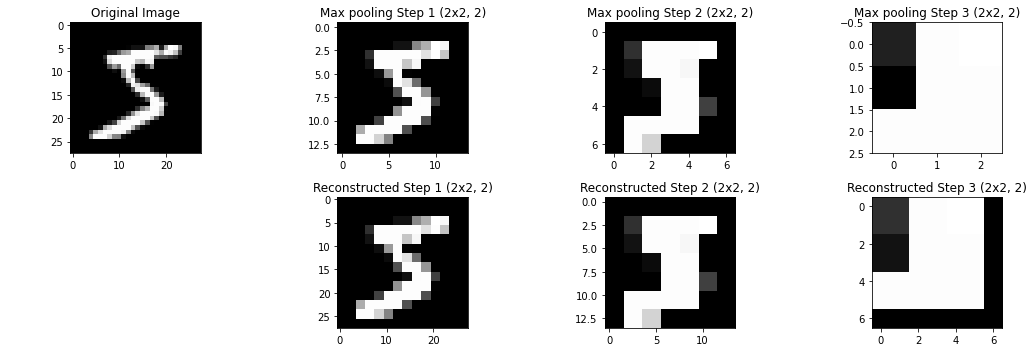

In [8]:
# Plot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 5))

axes[0, 0].imshow(input_max_pooling_mnist.reshape(28, 28), cmap='gray')
axes[0, 0].set_title('Original Image')

axes[0, 1].imshow(output_max_pooling_mnist_step_1, cmap='gray')
axes[0, 1].set_title('Max pooling Step 1 (2x2, 2)')

axes[0, 2].imshow(output_max_pooling_mnist_step_2, cmap='gray')
axes[0, 2].set_title('Max pooling Step 2 (2x2, 2)')

axes[0, 3].imshow(output_max_pooling_mnist_step_3, cmap='gray')
axes[0, 3].set_title('Max pooling Step 3 (2x2, 2)')

axes[1, 0].axis('off')

axes[1, 3].imshow(reconstructed_max_pooling_mnist_step_3, cmap='gray')
axes[1, 3].set_title('Reconstructed Step 3 (2x2, 2)')

axes[1, 2].imshow(reconstructed_max_pooling_mnist_step_2, cmap='gray')
axes[1, 2].set_title('Reconstructed Step 2 (2x2, 2)')

axes[1, 1].imshow(reconstructed_max_pooling_mnist_step_1, cmap='gray')
axes[1, 1].set_title('Reconstructed Step 1 (2x2, 2)')

fig.tight_layout()
plt.show()

## Max pooling with np.max (JPG)

In [9]:
import numpy as np
import datetime
from PIL import Image

def max_pooling(input_matrix, kernel_size=2, stride=2):
    # n, m = input_matrix.shape
    n = input_matrix.shape[0]
    m = input_matrix.shape[1]
    output_matrix = np.zeros((n // stride, m // stride))
    for i in range(0, n, stride):
        for j in range(0, m, stride):
            # fix out of bounds
            if i + kernel_size > n or j + kernel_size > m:
                continue
            output_matrix[i // stride, j // stride] = np.max(input_matrix[i:i + kernel_size, j:j + kernel_size])
    return output_matrix

def unpooling(output_matrix, kernel_size=2, stride=2, input_shape=None):
    if input_shape is None:
        n = output_matrix.shape[0] * stride
        m = output_matrix.shape[1] * stride
    else:
        n = input_shape[0]
        m = input_shape[1]
    input_matrix = np.zeros((n, m))
    for i in range(0, n, stride):
        for j in range(0, m, stride):
            # fix out of bounds
            if i + kernel_size > n or j + kernel_size > m:
                continue
            pool_value = output_matrix[i // stride, j // stride]
            input_matrix[i:i + kernel_size, j:j + kernel_size] = np.full((kernel_size, kernel_size), pool_value)
    return input_matrix

# Sample input image with shape (300, 332)
input_max_pooling_jpg = np.array(Image.open('example.jpg').convert('L'))/255

start = datetime.datetime.now()

# Apply max pooling with kernel size 2 and stride 2
output_max_pooling_jpg_step_1 = max_pooling(input_max_pooling_jpg, kernel_size=2, stride=2)

# Apply max pooling with kernel size 2 and stride 2
output_max_pooling_jpg_step_2 = max_pooling(output_max_pooling_jpg_step_1, kernel_size=2, stride=2)

# Apply max pooling with kernel size 2 and stride 2
output_max_pooling_jpg_step_3 = max_pooling(output_max_pooling_jpg_step_2, kernel_size=2, stride=2)

# Apply unpooling
reconstructed_max_pooling_jpg_step_3 = unpooling(output_max_pooling_jpg_step_3, kernel_size=2, stride=2, input_shape=output_max_pooling_jpg_step_2.shape)

# Apply unpooling
reconstructed_max_pooling_jpg_step_2 = unpooling(output_max_pooling_jpg_step_2, kernel_size=2, stride=2, input_shape=output_max_pooling_jpg_step_1.shape)

# Apply unpooling
reconstructed_max_pooling_jpg_step_1 = unpooling(output_max_pooling_jpg_step_1, kernel_size=2, stride=2, input_shape=input_max_pooling_jpg.shape)

end = datetime.datetime.now()

print(f"Time execution (seconds): {(end - start).seconds}")
print(f"Time execution (microseconds): {(end - start).microseconds}")
print("Input image shape:", input_max_pooling_jpg.shape)
print("Output step 1 shape:", output_max_pooling_jpg_step_1.shape)
print("Output step 2 shape:", output_max_pooling_jpg_step_2.shape)
print("Output step 3 shape:", output_max_pooling_jpg_step_3.shape)
print("Reconstructed step 3 shape:", reconstructed_max_pooling_jpg_step_3.shape)
print("Reconstructed step 2 shape:", reconstructed_max_pooling_jpg_step_2.shape)
print("Reconstructed step 1 shape:", reconstructed_max_pooling_jpg_step_1.shape)

Time execution (seconds): 0
Time execution (microseconds): 581622
Input image shape: (300, 332)
Output step 1 shape: (150, 166)
Output step 2 shape: (75, 83)
Output step 3 shape: (37, 41)
Reconstructed step 3 shape: (75, 83)
Reconstructed step 2 shape: (150, 166)
Reconstructed step 1 shape: (300, 332)


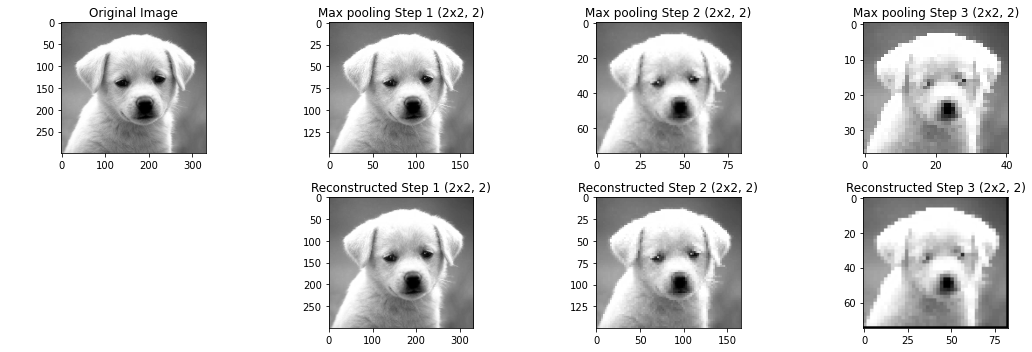

In [10]:
# Plot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 5))

axes[0, 0].imshow(input_max_pooling_jpg, cmap='gray')
axes[0, 0].set_title('Original Image')

axes[0, 1].imshow(output_max_pooling_jpg_step_1, cmap='gray')
axes[0, 1].set_title('Max pooling Step 1 (2x2, 2)')

axes[0, 2].imshow(output_max_pooling_jpg_step_2, cmap='gray')
axes[0, 2].set_title('Max pooling Step 2 (2x2, 2)')

axes[0, 3].imshow(output_max_pooling_jpg_step_3, cmap='gray')
axes[0, 3].set_title('Max pooling Step 3 (2x2, 2)')

axes[1, 0].axis('off')

axes[1, 3].imshow(reconstructed_max_pooling_jpg_step_3, cmap='gray')
axes[1, 3].set_title('Reconstructed Step 3 (2x2, 2)')

axes[1, 2].imshow(reconstructed_max_pooling_jpg_step_2, cmap='gray')
axes[1, 2].set_title('Reconstructed Step 2 (2x2, 2)')

axes[1, 1].imshow(reconstructed_max_pooling_jpg_step_1, cmap='gray')
axes[1, 1].set_title('Reconstructed Step 1 (2x2, 2)')

fig.tight_layout()
plt.show()

# BPCA

## BPCA Sklearn (MNIST)

In [11]:
import numpy as np
from sklearn.decomposition import PCA
from PIL import Image
import datetime

def pca_sklearn(data):
  pca = PCA(n_components=1)
  pca.fit(data)
  reduced = pca.transform(data)

  mu = np.mean(data, axis=0)
  n_comp = 1
  reversed = np.dot(pca.transform(data)[:, :n_comp], pca.components_[:n_comp, :])
  reversed += mu

  return reduced, reversed

def make_blocks(input_matrix, pool_size=2, stride=2):
    n = input_matrix.shape[0]
    m = input_matrix.shape[1]
    output_matrix = []
    for i in range(0, n, stride):
        for j in range(0, m, stride):
            # fix out of bounds
            if i + pool_size > n or j + pool_size > m:
                continue
            output_matrix.append(input_matrix[i:i + pool_size, j:j + pool_size])

    output_matrix = np.array(output_matrix)
    output_matrix = output_matrix.reshape(output_matrix.shape[0], output_matrix.shape[1]*output_matrix.shape[2])

    return output_matrix

def merge_blocks(input_matrix, pool_size=2, stride=2, original_shape=None):
    n_blocks = input_matrix.shape[0]
    block_length = input_matrix.shape[1]
    block_side = int(np.sqrt(block_length))
    if original_shape:
        n_original, m_original = original_shape
    else:
        n_original = n_blocks * pool_size
        m_original = block_side * pool_size
    output_matrix = np.zeros((n_original, m_original))
    block_index = 0
    for i in range(0, n_original, pool_size):
        for j in range(0, m_original, pool_size):
            # fix out of bounds
            if i + pool_size > n_original or j + pool_size > m_original:
                continue
            block = input_matrix[block_index].reshape(block_side, block_side)
            output_matrix[i:i + pool_size, j:j + pool_size] = block
            block_index += 1
    return output_matrix

def bpca_pooling_sklearn(input_matrix, pool_size=2, stride=2):
    output_matrix = make_blocks(input_matrix, pool_size=pool_size, stride=stride)
    reduced, reversed = pca_sklearn(output_matrix)
    reduced = reduced.reshape(input_matrix.shape[0] // pool_size, input_matrix.shape[1] // pool_size)
    reversed = merge_blocks(reversed, pool_size=pool_size, stride=stride, original_shape=(input_matrix.shape[0], input_matrix.shape[1]))

    return reduced, reversed

# Sample input image with shape (28, 28, 1)
input_sklearn_mnist = x_train[0]/255

start = datetime.datetime.now()

# Apply BPCA with kernel size 2 and stride 2
output_sklearn_mnist_step_1, reconstructed_sklearn_mnist_step_1 = bpca_pooling_sklearn(input_sklearn_mnist, pool_size=2, stride=2)

# Apply BPCA with kernel size 2 and stride 2
output_sklearn_mnist_step_2, reconstructed_sklearn_mnist_step_2 = bpca_pooling_sklearn(output_sklearn_mnist_step_1, pool_size=2, stride=2)

# Apply BPCA with kernel size 2 and stride 2
output_sklearn_mnist_step_3, reconstructed_sklearn_mnist_step_3 = bpca_pooling_sklearn(output_sklearn_mnist_step_2, pool_size=2, stride=2)

end = datetime.datetime.now()

print(f"Time execution (seconds): {(end - start).seconds}")
print(f"Time execution (microseconds): {(end - start).microseconds}")
print("Input image shape:", input_sklearn_mnist.shape)
print("Output step 1 shape:", output_sklearn_mnist_step_1.shape)
print("Output step 2 shape:", output_sklearn_mnist_step_2.shape)
print("Output step 3 shape:", output_sklearn_mnist_step_3.shape)
print("Reconstructed step 3 shape:", reconstructed_sklearn_mnist_step_3.shape)
print("Reconstructed step 2 shape:", reconstructed_sklearn_mnist_step_2.shape)
print("Reconstructed step 1 shape:", reconstructed_sklearn_mnist_step_1.shape)

Time execution (seconds): 0
Time execution (microseconds): 3262
Input image shape: (28, 28, 1)
Output step 1 shape: (14, 14)
Output step 2 shape: (7, 7)
Output step 3 shape: (3, 3)
Reconstructed step 3 shape: (7, 7)
Reconstructed step 2 shape: (14, 14)
Reconstructed step 1 shape: (28, 28)


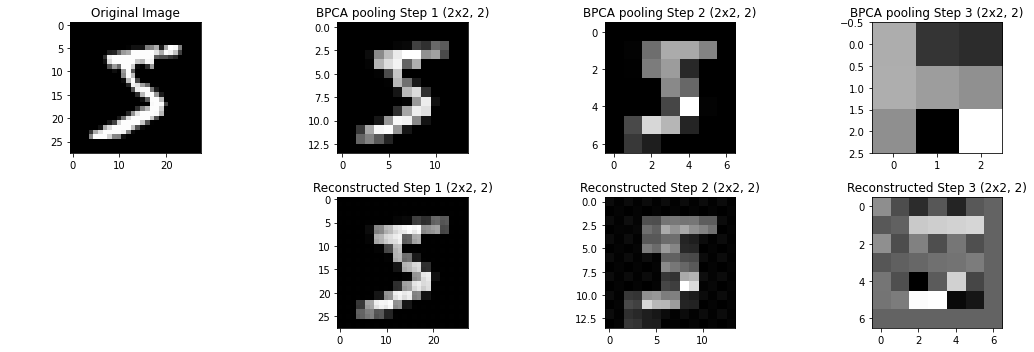

In [12]:
# Plot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 5))

axes[0, 0].imshow(input_sklearn_mnist.reshape(28, 28), cmap='gray')
axes[0, 0].set_title('Original Image')

axes[0, 1].imshow(output_sklearn_mnist_step_1, cmap='gray')
axes[0, 1].set_title('BPCA pooling Step 1 (2x2, 2)')

axes[0, 2].imshow(output_sklearn_mnist_step_2, cmap='gray')
axes[0, 2].set_title('BPCA pooling Step 2 (2x2, 2)')

axes[0, 3].imshow(output_sklearn_mnist_step_3, cmap='gray')
axes[0, 3].set_title('BPCA pooling Step 3 (2x2, 2)')

axes[1, 0].axis('off')

axes[1, 3].imshow(reconstructed_sklearn_mnist_step_3, cmap='gray')
axes[1, 3].set_title('Reconstructed Step 3 (2x2, 2)')

axes[1, 2].imshow(reconstructed_sklearn_mnist_step_2, cmap='gray')
axes[1, 2].set_title('Reconstructed Step 2 (2x2, 2)')

axes[1, 1].imshow(reconstructed_sklearn_mnist_step_1, cmap='gray')
axes[1, 1].set_title('Reconstructed Step 1 (2x2, 2)')

plt.tight_layout()
plt.show()

## BPCA Sklearn (JPG)

In [13]:
import numpy as np
from sklearn.decomposition import PCA
from PIL import Image

def pca_sklearn(data):
  pca = PCA(n_components=1)
  pca.fit(data)
  reduced = pca.transform(data)

  mu = np.mean(data, axis=0)
  n_comp = 1
  reversed = np.dot(pca.transform(data)[:, :n_comp], pca.components_[:n_comp, :])
  reversed += mu

  return reduced, reversed

def make_blocks(input_matrix, pool_size=2, stride=2):
    n = input_matrix.shape[0]
    m = input_matrix.shape[1]
    output_matrix = []
    for i in range(0, n, stride):
        for j in range(0, m, stride):
            # fix out of bounds
            if i + pool_size > n or j + pool_size > m:
                continue
            output_matrix.append(input_matrix[i:i + pool_size, j:j + pool_size])

    output_matrix = np.array(output_matrix)
    output_matrix = output_matrix.reshape(output_matrix.shape[0], output_matrix.shape[1]*output_matrix.shape[2])

    return output_matrix

def merge_blocks(input_matrix, pool_size=2, stride=2, original_shape=None):
    n_blocks = input_matrix.shape[0]
    block_length = input_matrix.shape[1]
    block_side = int(np.sqrt(block_length))
    if original_shape:
        n_original, m_original = original_shape
    else:
        n_original = n_blocks * pool_size
        m_original = block_side * pool_size
    output_matrix = np.zeros((n_original, m_original))
    block_index = 0
    for i in range(0, n_original, pool_size):
        for j in range(0, m_original, pool_size):
            # fix out of bounds
            if i + pool_size > n_original or j + pool_size > m_original:
                continue
            block = input_matrix[block_index].reshape(block_side, block_side)
            output_matrix[i:i + pool_size, j:j + pool_size] = block
            block_index += 1
    return output_matrix

def bpca_pooling(input_matrix, pool_size=2, stride=2):
    output_matrix = make_blocks(input_matrix, pool_size=pool_size, stride=stride)
    reduced, reversed = pca_sklearn(output_matrix)
    reduced = reduced.reshape(input_matrix.shape[0] // pool_size, input_matrix.shape[1] // pool_size)
    reversed = merge_blocks(reversed, pool_size=pool_size, stride=stride, original_shape=(input_matrix.shape[0], input_matrix.shape[1]))

    return reduced, reversed

# Sample input image with shape (300, 332)
input_image_sklearn_jpg = np.array(Image.open('example.jpg').convert('L'))/255

# Apply BPCA with kernel size 2 and stride 2
output_sklearn_jpg_step_1, reconstructed_sklearn_jpg_step_1 = bpca_pooling(input_image_sklearn_jpg, pool_size=2, stride=2)

# Apply BPCA with kernel size 2 and stride 2
output_sklearn_jpg_step_2, reconstructed_sklearn_jpg_step_2 = bpca_pooling(output_sklearn_jpg_step_1, pool_size=2, stride=2)

# Apply BPCA with kernel size 2 and stride 2
output_sklearn_jpg_step_3, reconstructed_sklearn_jpg_step_3 = bpca_pooling(output_sklearn_jpg_step_2, pool_size=2, stride=2)

# Apply BPCA with kernel size 2 and stride 2
output_sklearn_jpg_step_4, reconstructed_sklearn_jpg_step_4 = bpca_pooling(output_sklearn_jpg_step_3, pool_size=2, stride=2)

print("Input image shape:", input_image_sklearn_jpg.shape)
print("Output image 1 shape:", output_sklearn_jpg_step_1.shape)
print("Output image 2 shape:", output_sklearn_jpg_step_2.shape)
print("Output image 3 shape:", output_sklearn_jpg_step_3.shape)
print("Output image 4 shape:", output_sklearn_jpg_step_4.shape)
print("Reconstructed step 4 shape:", reconstructed_sklearn_jpg_step_4.shape)
print("Reconstructed step 3 shape:", reconstructed_sklearn_jpg_step_3.shape)
print("Reconstructed step 2 shape:", reconstructed_sklearn_jpg_step_2.shape)
print("Reconstructed step 1 shape:", reconstructed_sklearn_jpg_step_1.shape)

Input image shape: (300, 332)
Output image 1 shape: (150, 166)
Output image 2 shape: (75, 83)
Output image 3 shape: (37, 41)
Output image 4 shape: (18, 20)
Reconstructed step 4 shape: (37, 41)
Reconstructed step 3 shape: (75, 83)
Reconstructed step 2 shape: (150, 166)
Reconstructed step 1 shape: (300, 332)


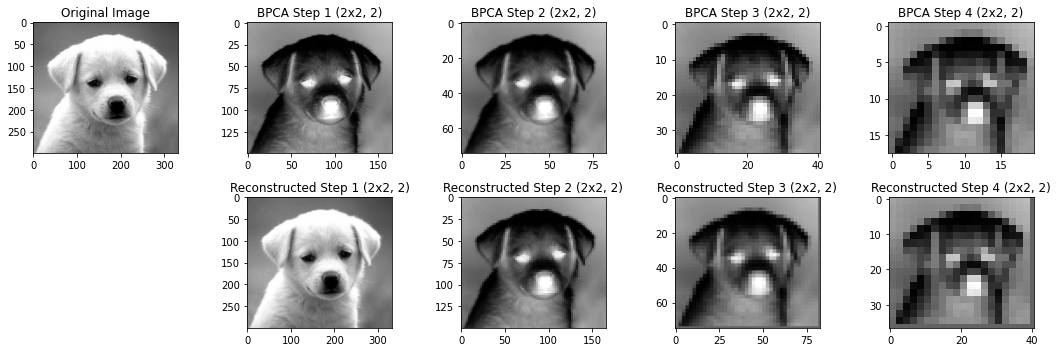

In [14]:
# Plot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))

axes[0, 0].imshow(input_image_sklearn_jpg.reshape(300, 332), cmap='gray')
axes[0, 0].set_title('Original Image')

axes[0, 1].imshow(output_sklearn_jpg_step_1, cmap='gray')
axes[0, 1].set_title('BPCA Step 1 (2x2, 2)')

axes[0, 2].imshow(output_sklearn_jpg_step_2, cmap='gray')
axes[0, 2].set_title('BPCA Step 2 (2x2, 2)')

axes[0, 3].imshow(output_sklearn_jpg_step_3, cmap='gray')
axes[0, 3].set_title('BPCA Step 3 (2x2, 2)')

axes[0, 4].imshow(output_sklearn_jpg_step_4, cmap='gray')
axes[0, 4].set_title('BPCA Step 4 (2x2, 2)')

axes[1, 0].axis('off')

axes[1, 4].imshow(reconstructed_sklearn_jpg_step_4, cmap='gray')
axes[1, 4].set_title('Reconstructed Step 4 (2x2, 2)')

axes[1, 3].imshow(reconstructed_sklearn_jpg_step_3, cmap='gray')
axes[1, 3].set_title('Reconstructed Step 3 (2x2, 2)')

axes[1, 2].imshow(reconstructed_sklearn_jpg_step_2, cmap='gray')
axes[1, 2].set_title('Reconstructed Step 2 (2x2, 2)')

axes[1, 1].imshow(reconstructed_sklearn_jpg_step_1, cmap='gray')
axes[1, 1].set_title('Reconstructed Step 1 (2x2, 2)')

fig.tight_layout()
plt.show()

In [15]:
import numpy as np
import tensorflow as tf

def pca_tf(data):
  n_components = 1

  data = tf.cast(data, tf.float64)

  # Normalize the data by subtracting the mean and dividing by the standard deviation
  mean = tf.reduce_mean(data, axis=0)
  std = tf.math.reduce_std(data, axis=0)
  data = (data - mean) / std

  # Perform the Singular Value Decomposition (SVD) on the data
  s, u, v = tf.linalg.svd(data)

  # Extract the first n principal components from the matrix v
  pca_components = v[:, :n_components]

  # Perform the PCA transformation on the data
  transformed_data = tf.matmul(data, pca_components)

  return transformed_data

def bpca_pooling_tf(input_matrix, kernel_size=2, stride=2):
    n = input_matrix.shape[0]
    m = input_matrix.shape[1]
    # output_matrix = np.zeros((n // stride, m // stride))
    output_matrix = []
    for i in range(0, n, stride):
        for j in range(0, m, stride):
            output_matrix.append(input_matrix[i:i + kernel_size, j:j + kernel_size])

    output_matrix = np.array(output_matrix)
    output_matrix = output_matrix.reshape(output_matrix.shape[0], output_matrix.shape[1]*output_matrix.shape[2])

    return pca_tf(output_matrix).numpy().reshape(14,14)

# Sample input image with shape (28, 28, 1)
# input_image = np.random.rand(28, 28, 1)
input_image = x_train[0]/255

# Apply max pooling with kernel size 2 and stride 2
output_image = bpca_pooling_tf(input_image, kernel_size=2, stride=2)

print("Input image shape:", input_image.shape)
print("Output image shape:", output_image.shape)

Input image shape: (28, 28, 1)
Output image shape: (14, 14)


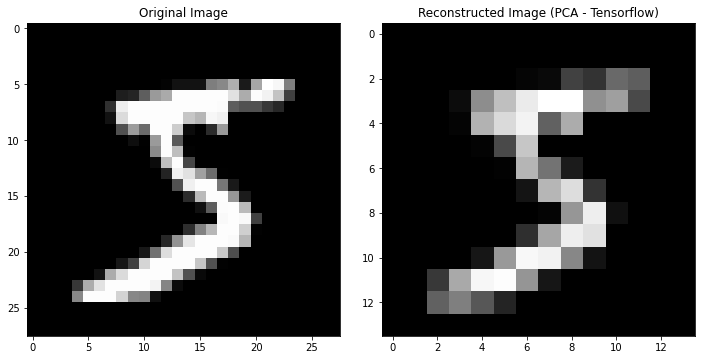

In [16]:
# Plot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.tight_layout()

axes[0].imshow(input_image.reshape(28,28), cmap='gray')
axes[0].set_title('Original Image')
# axes[0].axis('off')

axes[1].imshow(output_image, cmap='gray')
axes[1].set_title('Reconstructed Image (PCA - Tensorflow)')
# axes[1].axis('off')

plt.show()

## BPCA Tensorflow (MNIST)

In [17]:
from PIL import Image
import datetime
import numpy as np
import tensorflow as tf

def pca_tf(data):
  n_components = 1

  data = tf.cast(data, tf.float64)

  # Normalize the data by subtracting the mean and dividing by the standard deviation
  mean = tf.reduce_mean(data, axis=0)
  std = tf.math.reduce_std(data, axis=0)
  data = (data - mean) / std

  # Perform the Singular Value Decomposition (SVD) on the data
  s, u, v = tf.linalg.svd(data)

  # Extract the first n principal components from the matrix v
  pca_components = v[:, :n_components]

  # Perform the PCA transformation on the data
  transformed_data = tf.matmul(data, pca_components)

  # Revert the PCA transformation on the transformed data
  original_data = tf.matmul(transformed_data, tf.linalg.matrix_transpose(pca_components))

  # Reconstruct the original data by multiplying by the standard deviation and adding the mean of the original data
  original_data = (original_data * tf.math.reduce_std(data, axis=0)) + tf.reduce_mean(data, axis=0)

  return transformed_data, original_data

def make_blocks(input_matrix, pool_size=2, stride=2):
    n = input_matrix.shape[0]
    m = input_matrix.shape[1]
    output_matrix = []
    for i in range(0, n, stride):
        for j in range(0, m, stride):
            # fix out of bounds
            if i + pool_size > n or j + pool_size > m:
                continue
            output_matrix.append(input_matrix[i:i + pool_size, j:j + pool_size])

    output_matrix = np.array(output_matrix)
    output_matrix = output_matrix.reshape(output_matrix.shape[0], output_matrix.shape[1]*output_matrix.shape[2])

    return output_matrix

def merge_blocks(input_matrix, pool_size=2, stride=2, original_shape=None):
    n_blocks = input_matrix.shape[0]
    block_length = input_matrix.shape[1]
    block_side = int(np.sqrt(block_length))
    if original_shape:
        n_original, m_original = original_shape
    else:
        n_original = n_blocks * pool_size
        m_original = block_side * pool_size
    output_matrix = np.zeros((n_original, m_original))
    block_index = 0
    for i in range(0, n_original, pool_size):
        for j in range(0, m_original, pool_size):
            # fix out of bounds
            if i + pool_size > n_original or j + pool_size > m_original:
                continue
            block = tf.reshape(input_matrix[block_index], (block_side, block_side))
            output_matrix[i:i + pool_size, j:j + pool_size] = block
            block_index += 1
    return output_matrix

def bpca_pooling_tf(input_matrix, pool_size=2, stride=2):
    output_matrix = make_blocks(input_matrix, pool_size=pool_size, stride=stride)
    reduced, reversed = pca_tf(output_matrix)
    reduced = tf.reshape(reduced, (input_matrix.shape[0] // pool_size, input_matrix.shape[1] // pool_size))
    reversed = merge_blocks(reversed, pool_size=pool_size, stride=stride, original_shape=(input_matrix.shape[0], input_matrix.shape[1]))

    return reduced, reversed

# Sample input image with shape (28, 28, 1)
input_tf_mnist = x_train[0]/255

start = datetime.datetime.now()

# Convert the image to Tensor
input_tf_mnist = tf.convert_to_tensor(input_tf_mnist, dtype=tf.float64)

# Apply BPCA with kernel size 2 and stride 2
output_tf_mnist_step_1, reconstructed_tf_mnist_step_1 = bpca_pooling_tf(input_tf_mnist, pool_size=2, stride=2)

# Apply BPCA with kernel size 2 and stride 2
output_tf_mnist_step_2, reconstructed_tf_mnist_step_2 = bpca_pooling_tf(output_tf_mnist_step_1, pool_size=2, stride=2)

# Apply BPCA with kernel size 2 and stride 2
output_tf_mnist_step_3, reconstructed_tf_mnist_step_3 = bpca_pooling_tf(output_tf_mnist_step_2, pool_size=2, stride=2)

end = datetime.datetime.now()

print(f"Time execution (seconds): {(end - start).seconds}")
print(f"Time execution (microseconds): {(end - start).microseconds}")
print("Input image shape:", input_tf_mnist.shape)
print("Output step 1 shape:", output_tf_mnist_step_1.shape)
print("Output step 2 shape:", output_tf_mnist_step_2.shape)
print("Output step 3 shape:", output_tf_mnist_step_3.shape)
print("Reconstructed step 3 shape:", reconstructed_tf_mnist_step_3.shape)
print("Reconstructed step 2 shape:", reconstructed_tf_mnist_step_2.shape)
print("Reconstructed step 1 shape:", reconstructed_tf_mnist_step_1.shape)

Time execution (seconds): 0
Time execution (microseconds): 152151
Input image shape: (28, 28, 1)
Output step 1 shape: (14, 14)
Output step 2 shape: (7, 7)
Output step 3 shape: (3, 3)
Reconstructed step 3 shape: (7, 7)
Reconstructed step 2 shape: (14, 14)
Reconstructed step 1 shape: (28, 28)


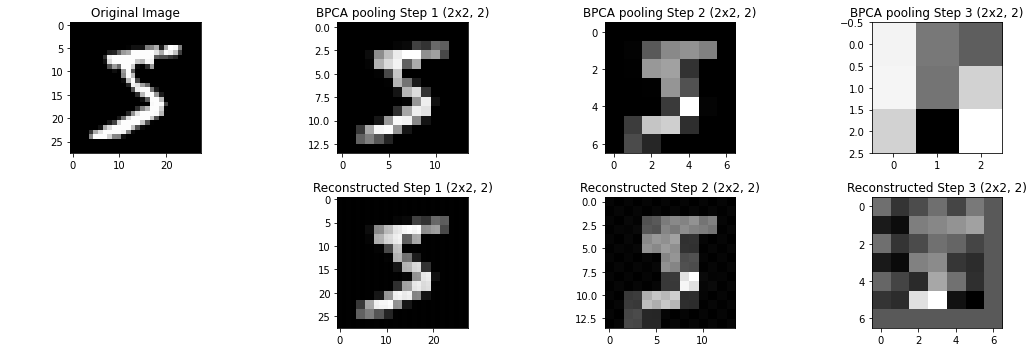

In [18]:
# Plot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 5))

axes[0, 0].imshow(tf.reshape(input_tf_mnist, (28, 28)), cmap='gray')
axes[0, 0].set_title('Original Image')

axes[0, 1].imshow(output_tf_mnist_step_1, cmap='gray')
axes[0, 1].set_title('BPCA pooling Step 1 (2x2, 2)')

axes[0, 2].imshow(output_tf_mnist_step_2, cmap='gray')
axes[0, 2].set_title('BPCA pooling Step 2 (2x2, 2)')

axes[0, 3].imshow(output_tf_mnist_step_3, cmap='gray')
axes[0, 3].set_title('BPCA pooling Step 3 (2x2, 2)')

axes[1, 0].axis('off')

axes[1, 3].imshow(reconstructed_tf_mnist_step_3, cmap='gray')
axes[1, 3].set_title('Reconstructed Step 3 (2x2, 2)')

axes[1, 2].imshow(reconstructed_tf_mnist_step_2, cmap='gray')
axes[1, 2].set_title('Reconstructed Step 2 (2x2, 2)')

axes[1, 1].imshow(reconstructed_tf_mnist_step_1, cmap='gray')
axes[1, 1].set_title('Reconstructed Step 1 (2x2, 2)')

fig.tight_layout()
plt.show()

## BPCA Tensorflow (JPG)

In [19]:
from PIL import Image
import datetime
import numpy as np
import tensorflow as tf

def pca_tf(data):
  n_components = 1

  data = tf.cast(data, tf.float64)

  # Normalize the data by subtracting the mean and dividing by the standard deviation
  mean = tf.reduce_mean(data, axis=0)
  std = tf.math.reduce_std(data, axis=0)
  data = (data - mean) / std

  # Perform the Singular Value Decomposition (SVD) on the data
  s, u, v = tf.linalg.svd(data)

  # Extract the first n principal components from the matrix v
  pca_components = v[:, :n_components]

  # Perform the PCA transformation on the data
  transformed_data = tf.matmul(data, pca_components)

  # Revert the PCA transformation on the transformed data
  original_data = tf.matmul(transformed_data, tf.linalg.matrix_transpose(pca_components))

  # Reconstruct the original data by multiplying by the standard deviation and adding the mean of the original data
  original_data = (original_data * tf.math.reduce_std(data, axis=0)) + tf.reduce_mean(data, axis=0)

  return transformed_data, original_data

def make_blocks(input_matrix, pool_size=2, stride=2):
    n = input_matrix.shape[0]
    m = input_matrix.shape[1]
    output_matrix = []
    for i in range(0, n, stride):
        for j in range(0, m, stride):
            # fix out of bounds
            if i + pool_size > n or j + pool_size > m:
                continue
            output_matrix.append(input_matrix[i:i + pool_size, j:j + pool_size])

    output_matrix = np.array(output_matrix)
    output_matrix = output_matrix.reshape(output_matrix.shape[0], output_matrix.shape[1]*output_matrix.shape[2])

    return output_matrix

def merge_blocks(input_matrix, pool_size=2, stride=2, original_shape=None):
    n_blocks = input_matrix.shape[0]
    block_length = input_matrix.shape[1]
    block_side = int(np.sqrt(block_length))
    if original_shape:
        n_original, m_original = original_shape
    else:
        n_original = n_blocks * pool_size
        m_original = block_side * pool_size
    output_matrix = np.zeros((n_original, m_original))
    block_index = 0
    for i in range(0, n_original, pool_size):
        for j in range(0, m_original, pool_size):
            # fix out of bounds
            if i + pool_size > n_original or j + pool_size > m_original:
                continue
            block = tf.reshape(input_matrix[block_index], (block_side, block_side))
            output_matrix[i:i + pool_size, j:j + pool_size] = block
            block_index += 1
    return output_matrix

def bpca_pooling_tf(input_matrix, pool_size=2, stride=2):
    output_matrix = make_blocks(input_matrix, pool_size=pool_size, stride=stride)
    reduced, reversed = pca_tf(output_matrix)
    reduced = tf.reshape(reduced, (input_matrix.shape[0] // pool_size, input_matrix.shape[1] // pool_size))
    reversed = merge_blocks(reversed, pool_size=pool_size, stride=stride, original_shape=(input_matrix.shape[0], input_matrix.shape[1]))

    return reduced, reversed

# Sample input image with shape (300, 332)
input_tf_image_jpg = np.array(Image.open('example.jpg').convert('L'))/255

start = datetime.datetime.now()

# Convert the image to Tensor
input_tf_image_jpg = tf.convert_to_tensor(input_tf_image_jpg, dtype=tf.float64)

# Apply BPCA with kernel size 2 and stride 2
output_tf_jpg_step_1, reconstructed_tf_jpg_step_1 = bpca_pooling_tf(input_tf_image_jpg, pool_size=2, stride=2)

# Apply BPCA with kernel size 2 and stride 2
output_tf_jpg_step_2, reconstructed_tf_jpg_step_2 = bpca_pooling_tf(output_tf_jpg_step_1, pool_size=2, stride=2)

# Apply BPCA with kernel size 2 and stride 2
output_tf_jpg_step_3, reconstructed_tf_jpg_step_3 = bpca_pooling_tf(output_tf_jpg_step_2, pool_size=2, stride=2)

# Apply BPCA with kernel size 2 and stride 2
output_tf_jpg_step_4, reconstructed_tf_jpg_step_4 = bpca_pooling_tf(output_tf_jpg_step_3, pool_size=2, stride=2)

end = datetime.datetime.now()

print(f"Time execution (seconds): {(end - start).seconds}")
print(f"Time execution (microseconds): {(end - start).microseconds}")
print("Input image shape:", input_tf_image_jpg.shape)
print("Output step 1 shape:", output_tf_jpg_step_1.shape)
print("Output step 2 shape:", output_tf_jpg_step_2.shape)
print("Output step 3 shape:", output_tf_jpg_step_3.shape)
print("Output step 4 shape:", output_tf_jpg_step_4.shape)
print("Reconstructed step 4 shape:", reconstructed_tf_jpg_step_4.shape)
print("Reconstructed step 3 shape:", reconstructed_tf_jpg_step_3.shape)
print("Reconstructed step 2 shape:", reconstructed_tf_jpg_step_2.shape)
print("Reconstructed step 1 shape:", reconstructed_tf_jpg_step_1.shape)

Time execution (seconds): 18
Time execution (microseconds): 946832
Input image shape: (300, 332)
Output step 1 shape: (150, 166)
Output step 2 shape: (75, 83)
Output step 3 shape: (37, 41)
Output step 4 shape: (18, 20)
Reconstructed step 4 shape: (37, 41)
Reconstructed step 3 shape: (75, 83)
Reconstructed step 2 shape: (150, 166)
Reconstructed step 1 shape: (300, 332)


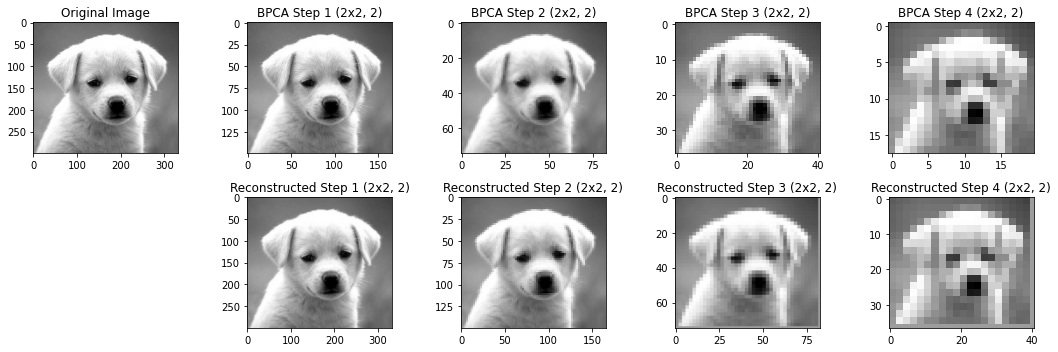

In [20]:
# Plot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))

axes[0, 0].imshow(tf.reshape(input_tf_image_jpg, (300, 332)), cmap='gray')
axes[0, 0].set_title('Original Image')

axes[0, 1].imshow(output_tf_jpg_step_1, cmap='gray')
axes[0, 1].set_title('BPCA Step 1 (2x2, 2)')

axes[0, 2].imshow(output_tf_jpg_step_2, cmap='gray')
axes[0, 2].set_title('BPCA Step 2 (2x2, 2)')

axes[0, 3].imshow(output_tf_jpg_step_3, cmap='gray')
axes[0, 3].set_title('BPCA Step 3 (2x2, 2)')

axes[0, 4].imshow(output_tf_jpg_step_4, cmap='gray')
axes[0, 4].set_title('BPCA Step 4 (2x2, 2)')

axes[1, 0].axis('off')

axes[1, 4].imshow(reconstructed_tf_jpg_step_4, cmap='gray')
axes[1, 4].set_title('Reconstructed Step 4 (2x2, 2)')

axes[1, 3].imshow(reconstructed_tf_jpg_step_3, cmap='gray')
axes[1, 3].set_title('Reconstructed Step 3 (2x2, 2)')

axes[1, 2].imshow(reconstructed_tf_jpg_step_2, cmap='gray')
axes[1, 2].set_title('Reconstructed Step 2 (2x2, 2)')

axes[1, 1].imshow(reconstructed_tf_jpg_step_1, cmap='gray')
axes[1, 1].set_title('Reconstructed Step 1 (2x2, 2)')

fig.tight_layout()
plt.show()